# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [135]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=100)
lngs = np.random.uniform(low=-180.000, high=180.000, size=100)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#capitalize the cities
cities = [c.title() for c in cities]
        
# Print the city count to confirm sufficient count

print (len(cities))


79


In [136]:
#display the list of cities
print (cities)

['Bambous Virieux', 'Sarmizegetusa', 'Portland', 'Bethel', 'Sao Filipe', 'Bredasdorp', 'Taolanaro', 'Ribeira Grande', 'Hofn', 'Geraldton', 'Ossora', 'Port Alfred', 'Puerto Ayora', 'Tam Ky', 'New Norfolk', 'Bam', 'Ushuaia', 'Blenheim', 'Luderitz', 'Albany', 'Chokurdakh', 'Olafsvik', 'Coihaique', 'Hermanus', 'Lesnyye Polyany', 'Bilma', 'Richards Bay', 'Hobart', 'Tsihombe', 'Kataysk', 'Falealupo', 'Port Elizabeth', 'Hasaki', 'Karratha', 'Jamestown', 'Santa Maria', 'Manta', 'Rikitea', 'Nome', 'Belushya Guba', 'Vila', 'Saint-Philippe', 'Nhulunbuy', 'Norman Wells', 'Torbay', 'Clyde River', 'Constantine', 'Mataura', 'Ratholo', 'Longyearbyen', 'Truth Or Consequences', 'Qaanaaq', 'Albion', 'Hualahuises', 'Avarua', 'Pangnirtung', 'Dingle', 'Tiksi', 'Alofi', 'Bubaque', 'Katsuura', 'Glendive', 'Oistins', 'Zhob', 'Barentsburg', 'Qaqortoq', 'Punta Arenas', 'Kibi', 'Vaini', 'Carbonia', 'Barrow', 'Lianzhou', 'Toguchin', 'Vao', 'Barawe', 'Kahului', 'Fairbanks', 'Cooma', 'Severo-Kurilsk']


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [137]:
# url information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#create lists for the desired information
lat = []
temp = []
humidity = []
wind = []
cloud = []
i=0
#request information from the api
for city in cities:
    response = requests.get(query_url + city).json()
    i=i+1
    try:
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        wind.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        print(f"{city} Complete - {i} of {len(cities)}")
        time.sleep(1)
        
    except (KeyError, IndexError):
        print(f"{city} Data Missing!!!.......... - {i} of {len(cities)}")
        lat.append(None)
        temp.append(None)
        humidity.append(None)
        wind.append(None)
        cloud.append(None)

        
#track the number of calls and responses        
    if i == len(cities):
        print(f"Complete") 
    

Bambous Virieux Complete - 1 of 79
Sarmizegetusa Complete - 2 of 79
Portland Complete - 3 of 79
Bethel Complete - 4 of 79
Sao Filipe Complete - 5 of 79
Bredasdorp Complete - 6 of 79
Taolanaro Data Missing!!!.......... - 7 of 79
Ribeira Grande Complete - 8 of 79
Hofn Complete - 9 of 79
Geraldton Complete - 10 of 79
Ossora Complete - 11 of 79
Port Alfred Complete - 12 of 79
Puerto Ayora Complete - 13 of 79
Tam Ky Complete - 14 of 79
New Norfolk Complete - 15 of 79
Bam Complete - 16 of 79
Ushuaia Complete - 17 of 79
Blenheim Complete - 18 of 79
Luderitz Complete - 19 of 79
Albany Complete - 20 of 79
Chokurdakh Complete - 21 of 79
Olafsvik Complete - 22 of 79
Coihaique Complete - 23 of 79
Hermanus Complete - 24 of 79
Lesnyye Polyany Complete - 25 of 79
Bilma Complete - 26 of 79
Richards Bay Complete - 27 of 79
Hobart Complete - 28 of 79
Tsihombe Data Missing!!!.......... - 29 of 79
Kataysk Complete - 30 of 79
Falealupo Data Missing!!!.......... - 31 of 79
Port Elizabeth Complete - 32 of 79

In [138]:
#create a dictionary from all the gathered lists
city_dict = {
    "City": cities,
    "Lat": lat,
    "Temp": temp,
    "Humidity": humidity,
    "Wind_Speed": wind,
    "Cloudiness": cloud
}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [139]:
#create a dataframe from the dictionary
city_df = pd.DataFrame(city_dict)

city_df.head(30)

,City,Lat,Temp,Humidity,Wind_Speed,Cloudiness
0,Bambous Virieux,-20.34,80.35,94.0,10.29,75.0
1,Sarmizegetusa,45.52,43.11,80.0,7.99,100.0
2,Portland,45.52,43.83,75.0,14.99,90.0
3,Bethel,41.37,53.98,37.0,14.99,1.0
4,Sao Filipe,14.90,76.93,47.0,17.58,0.0
5,Bredasdorp,-34.53,67.35,82.0,3.36,40.0
6,Taolanaro,NaN,NaN,NaN,NaN,NaN
7,Ribeira Grande,38.52,62.60,93.0,18.34,20.0
8,Hofn,64.25,35.60,59.0,23.04,75.0
9,Geraldton,-28.77,77.00,47.0,19.46,0.0


In [140]:
#clean up the dataframe- verify datatypes
city_df.dtypes


City           object
Lat           float64
Temp          float64
Humidity      float64
Wind_Speed    float64
Cloudiness    float64
dtype: object

In [141]:
#convert latitude, temp, humidity, wind speed, cloudiness to floating points
#city_df["Lat"] = pd.to_numeric(city_df["Lat"], errors='coerce')
#city_df["Temp"] = pd.to_numeric(city_df["Temp"], errors='coerce')
#city_df["Humidity"] = pd.to_numeric(city_df["Humidity"], errors='coerce')
#city_df["Wind_Speed"] = pd.to_numeric(city_df["Wind_Speed"], errors='coerce')
#city_df["Cloudiness"] = pd.to_numeric(city_df["Cloudiness"], errors='coerce')
#city_df.dtypes

In [142]:
#drop "na" values
city_df = city_df.dropna(how='any', axis=0)
#verify nan dropped
city_df.head(30)

,City,Lat,Temp,Humidity,Wind_Speed,Cloudiness
0,Bambous Virieux,-20.34,80.35,94.0,10.29,75.0
1,Sarmizegetusa,45.52,43.11,80.0,7.99,100.0
2,Portland,45.52,43.83,75.0,14.99,90.0
3,Bethel,41.37,53.98,37.0,14.99,1.0
4,Sao Filipe,14.90,76.93,47.0,17.58,0.0
5,Bredasdorp,-34.53,67.35,82.0,3.36,40.0
7,Ribeira Grande,38.52,62.60,93.0,18.34,20.0
8,Hofn,64.25,35.60,59.0,23.04,75.0
9,Geraldton,-28.77,77.00,47.0,19.46,0.0
10,Ossora,59.24,-0.44,69.0,2.06,0.0


In [143]:
#export dataframe to csv with option to drop the index
city_df.to_csv(output_data_file, index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

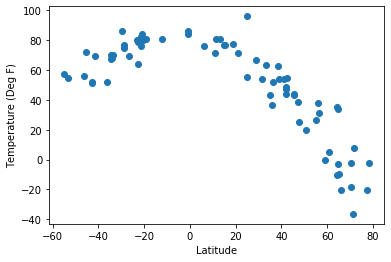

In [144]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Temp"])
plt.xlabel('Latitude')
plt.ylabel('Temperature (Deg F)')
plt.show()

#### Latitude vs. Humidity Plot

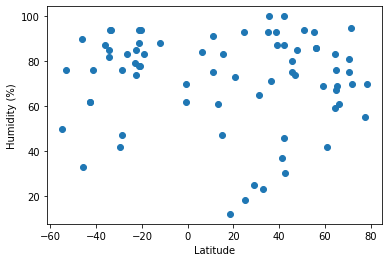

In [145]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Humidity"])
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.show()

#### Latitude vs. Cloudiness Plot

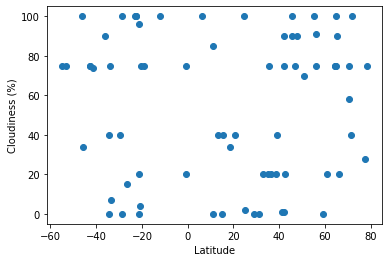

In [146]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Cloudiness"])
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.show()

#### Latitude vs. Wind Speed Plot

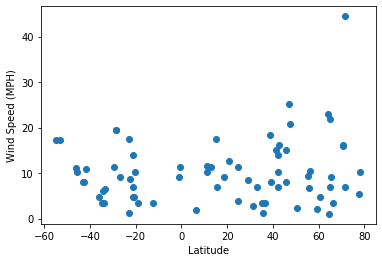

In [147]:
#scatter plot for latitude vs temperature
plt.scatter(city_df["Lat"], city_df["Wind_Speed"])
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.show()

## Linear Regression

In [148]:
# OPTIONAL: Create a function to create Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [149]:
# Create Northern and Southern Hemisphere DataFrames
north_df = city_df[city_df["Lat"]>0]
north_df.head()

,City,Lat,Temp,Humidity,Wind_Speed,Cloudiness
1,Sarmizegetusa,45.52,43.11,80.0,7.99,100.0
2,Portland,45.52,43.83,75.0,14.99,90.0
3,Bethel,41.37,53.98,37.0,14.99,1.0
4,Sao Filipe,14.90,76.93,47.0,17.58,0.0
7,Ribeira Grande,38.52,62.60,93.0,18.34,20.0


In [150]:
south_df = city_df[city_df["Lat"]<0]
south_df.head()

,City,Lat,Temp,Humidity,Wind_Speed,Cloudiness
0,Bambous Virieux,-20.34,80.35,94.0,10.29,75.0
5,Bredasdorp,-34.53,67.35,82.0,3.36,40.0
9,Geraldton,-28.77,77.00,47.0,19.46,0.0
11,Port Alfred,-33.59,70.00,94.0,6.46,7.0
12,Puerto Ayora,-0.74,84.00,62.0,11.41,20.0


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

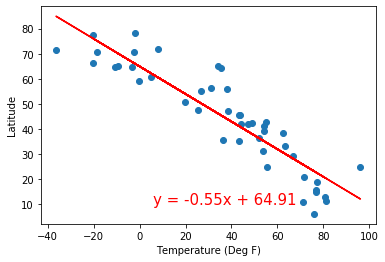

In [151]:
x_values = north_df["Temp"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

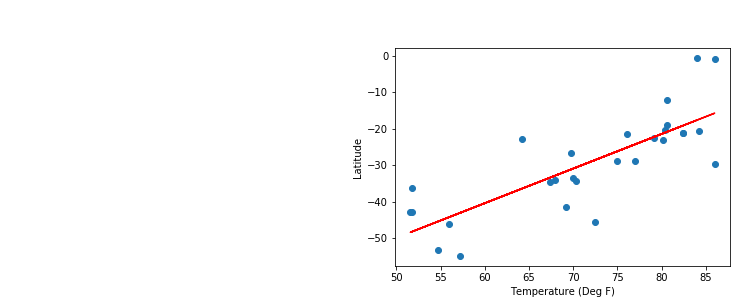

In [152]:
x_values = south_df["Temp"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Temperature (Deg F)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

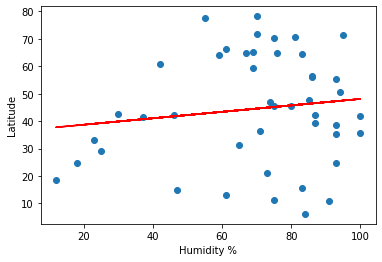

In [153]:
x_values = north_df["Humidity"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity %')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

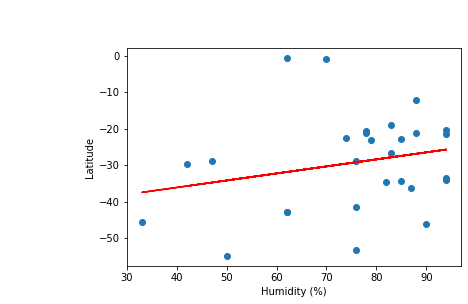

In [154]:
x_values = south_df["Humidity"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

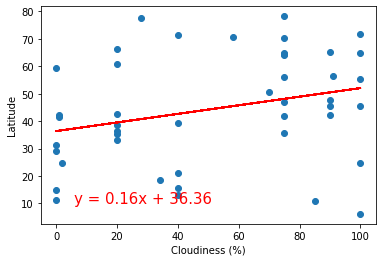

In [155]:
x_values = north_df["Cloudiness"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

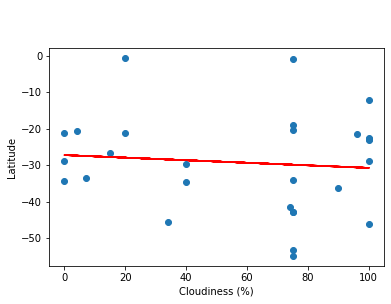

In [156]:
x_values = south_df["Cloudiness"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cloudiness (%)')
plt.ylabel('Latitude')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

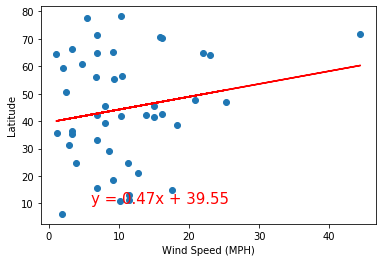

In [157]:
x_values = north_df["Wind_Speed"]
y_values = north_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

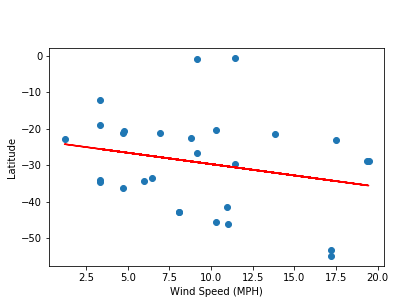

In [159]:
x_values = south_df["Wind_Speed"]
y_values = south_df["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Wind Speed (MPH)')
plt.ylabel('Latitude')
plt.show()